In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
import os
import sys
import random as rd

sys.path.append("..")

from AllMethods import PerturbedPendulum_Methods as pp

In [2]:
gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))

In [3]:
#Import Data
x, y = pp.read_dataset('x_train.txt', 'y_train.txt')

#Training Data
train_dataset, val_dataset = pp.train_dataset(x, y, 20, 180, 20) #val_len, train_batch, val_batch

In [4]:
#Models
class MyModel1(tf.keras.Model):

    def __init__(self):
        super(MyModel1, self).__init__()
        self.dense1 = tf.keras.layers.Dense(2, activation=tf.nn.tanh)
        
        self.dense2 = tf.keras.layers.Dense(12, activation=tf.nn.tanh)
        self.dense3 = tf.keras.layers.Dense(12, activation=tf.nn.tanh)
        
        self.dense4 = tf.keras.layers.Dense(2, activation=tf.nn.tanh)

    def call(self, inputs, training=False):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        return self.dense4(x)
    
class MyModel2(tf.keras.Model):

    def __init__(self):
        super(MyModel2, self).__init__()
        self.dense1 = tf.keras.layers.Dense(2, activation=tf.nn.tanh)
        
        self.dense2 = tf.keras.layers.Dense(20, activation=tf.nn.tanh)
        self.dense3 = tf.keras.layers.Dense(20, activation=tf.nn.tanh)
        self.dense4 = tf.keras.layers.Dense(20, activation=tf.nn.tanh)
        
        self.dense5 = tf.keras.layers.Dense(2, activation=tf.nn.tanh)

    def call(self, inputs, training=False):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        x = self.dense4(x)

        return self.dense5(x)
    

class MyModel3(tf.keras.Model):

    def __init__(self):
        super(MyModel3, self).__init__()
        self.dense1 = tf.keras.layers.Dense(2, activation=tf.nn.tanh)
        
        self.dense2 = tf.keras.layers.Dense(30, activation=tf.nn.tanh)
        self.dense3 = tf.keras.layers.Dense(30, activation=tf.nn.tanh)
        self.dense4 = tf.keras.layers.Dense(30, activation=tf.nn.tanh)
        self.dense5 = tf.keras.layers.Dense(30, activation=tf.nn.tanh)

        self.dense6 = tf.keras.layers.Dense(2, activation=tf.nn.tanh)

    def call(self, inputs, training=False):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        x = self.dense4(x)
        x = self.dense5(x)

        return self.dense6(x)

In [5]:
model3 = MyModel3()

In [8]:
#Decaying learning rate
# DECAYING LEARNING RATE
def scheduler(epoch, lr):
    if epoch%100==0:
        print("epoch: ", epoch)
    if epoch < 5:
        return lr
    else:
        return lr*tf.math.exp(-0.0002)
    
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [9]:
checkpoint_path_3 = "checkpoints_NN_HH_3/cp.ckpt"
checkpoint_dir_3 = os.path.dirname(checkpoint_path_3)

cp_callback_3 = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path_3,
                                                 save_weights_only=True,
                                                 save_best_only=True,
                                                 verbose=0)

In [10]:
model3.compile(
    loss= tf.keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.Adam(0.01),
    metrics=["accuracy"],
)

Epochs = 3000

history3 = model3.fit(train_dataset, epochs = Epochs, validation_data=val_dataset, callbacks=[callback, cp_callback_3], verbose=0)

epoch:  0
epoch:  100
epoch:  200
epoch:  300
epoch:  400
epoch:  500
epoch:  600
epoch:  700
epoch:  800
epoch:  900
epoch:  1000
epoch:  1100
epoch:  1200
epoch:  1300
epoch:  1400
epoch:  1500
epoch:  1600
epoch:  1700
epoch:  1800
epoch:  1900
epoch:  2000
epoch:  2100
epoch:  2200
epoch:  2300
epoch:  2400
epoch:  2500
epoch:  2600
epoch:  2700
epoch:  2800
epoch:  2900


In [ ]:
f = open("HM_NN_Loss.txt", "a")
for i in history3.history["loss"]:
        f.write(str(i))
        f.write("\n")
f.close()

f = open("HM_NN_Val.txt", "a")
for i in history3.history["val_loss"]:
        f.write(str(i))
        f.write("\n")
f.close()

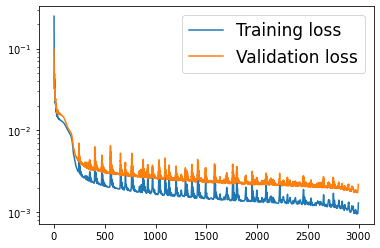

In [11]:
plt.plot(history3.history["loss"], label="Training loss")
plt.plot(history3.history["val_loss"], label="Validation loss")
plt.yscale("log")
plt.legend(fontsize=17)
plt.show()

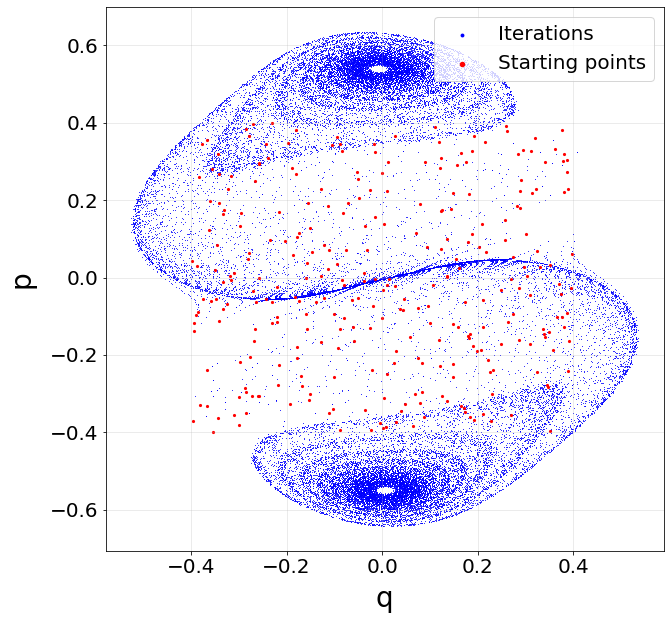

In [12]:
N = 300
x0 = np.array([[rd.randrange(-400, 400, 1)*0.001, rd.randrange(-400, 400, 1)*0.001] for _ in range(N)])
iterations = [model3(x0)]
for _ in range(200):
    iterations.append(model3(iterations[-1]))
    
plt.figure(figsize=(10,10))
colors = []
sizes = []
for i in range(N):
    if i==18:
        colors.append("r")
        sizes.append(10)
    else:
        colors.append("b")
        sizes.append(1)

plt.scatter(*zip(*iterations[0].numpy()), s=1, linewidth=0, color="b", label = "Iterations")

        
for i in iterations:
    plt.scatter(*zip(*i.numpy()), s=1, linewidth=0, color="b")
    
plt.scatter(*zip(*x0), s=10, linewidth=0, color="r", label = "Starting points")


plt.xlabel("q", fontsize=28, labelpad=8)
plt.ylabel("p", fontsize=28, labelpad=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(axis='both', alpha=.3)
lgnd = plt.legend(loc="upper right", numpoints=1, fontsize=20)
lgnd.legendHandles[0]._sizes = [15]
lgnd.legendHandles[1]._sizes = [30]
plt.show()